In [2]:
import pandas as pd
import numpy as np
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, cohen_kappa_score, f1_score
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import scipy

In [328]:
def data_balancer(x, y):

    tmp_y = np.squeeze(y)
    tmp_y = np.concatenate(tmp_y)
    ulbls = np.unique(tmp_y)
    hists = np.zeros((len(x), len(ulbls)))
    
    # for each recording
    for r in range(len(x)):

        # for each class
        for c in range(0,len(ulbls)):
            count_c = len(np.where(y[r]==c)[0])
            hists[r, c] = count_c
            
    all_counts = np.sum(hists, axis=0)

    min_count = np.min(all_counts)

    # for each event
    for c in range(0,len(ulbls)):
        #divide$&conqure resampling
        delection_counts = np.array(hists[:, c])
        goal_diff = all_counts[c] - min_count
        # delection_counts = np.zeros(len(hists[:,0]))

        remain = min_count
        while True:

            record_extract_factor = np.round(remain / len(np.where(delection_counts > 0)[0]))
            # record_extract_factor = goal_diff
            delection_counts[np.where(delection_counts>0)] -= record_extract_factor

            if len(np.where(delection_counts < 0)[0]) == 0:
                hists[:, c] -= delection_counts  # subtract the number to be erased
                break
            else:
                remain = np.sum(np.abs(delection_counts[np.where(delection_counts<0)]))
                delection_counts[np.where(delection_counts<0)] = 0


    #remove samples            
    for c in range(0,len(ulbls)): #each class
        for r in range(len(x)):  #each recordings
            count = hists[r, c]
            rmInd = np.where(y[r]==c)[0]
            y[r] = np.delete(y[r], rmInd[int(count):])
            x[r] = np.delete(x[r], rmInd[int(count):], axis=0)

    return x, y

In [346]:
path = './data/feats_lbls/lblr5/'
df = pd.DataFrame()
ds_x = []
ds_y = []
for filename in os.listdir(path):
    if filename.startswith('lbls') and filename[-5] == '1':
        print(filename)
        df1 = pd.read_csv(path+ 'feats' + filename[4:], header = None)
        df1['labels'] = pd.read_csv(path+ 'lbls' + filename[4:], header = None)

        #df1 = df1[df1.labels != 1.0]
        #df1.labels = df1.labels.replace(3.0, 1.0)
        print(df1.head())
        feat = df1.drop('labels', axis = 1)
        lbls = df1.labels

        ds_y.append(lbls.values)
        ds_x.append(feat.values)

ds_x, ds_y = data_balancer(ds_x, ds_y)

ds_x = np.squeeze(ds_x)
ds_x = np.concatenate(ds_x)

ds_y = np.squeeze(ds_y)
ds_y = np.concatenate(ds_y)



lbls_p17_a1.csv
          0         1         2         3         4          5  labels
0  3.278123 -1.624985  0.396563  0.001322  0.314196  86.355964     1.0
1  0.093665 -0.572364  0.454985  0.001517  0.327796  76.068244     1.0
2  2.457601  1.422330  0.495169  0.001651  0.338715  66.767690     1.0
3  5.767412  1.489018  0.518888  0.001730  0.347162  58.409872     1.0
4  0.994380 -1.608572  0.527917  0.001760  0.353345  50.950359     1.0
lbls_p3_a1.csv
          0         1         2         3         4           5  labels
0  0.074567  1.289267  0.195754 -0.000653  0.277188   86.806468     1.0
1  0.049373 -2.347935  0.248609 -0.000829  0.277927   97.867251     1.0
2  0.032138 -0.039232  0.291624 -0.000972  0.278136  106.201969     1.0
3  0.081641  0.098260  0.325607 -0.001085  0.277846  112.026939     1.0
4  0.085749  0.402918  0.351368 -0.001171  0.277086  115.558480     1.0
lbls_p1_a1.csv
          0         1         2         3         4           5  labels
0  0.267995 -1.320911  0

/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


In [3]:
path = './data/feats_lbls/lblr6/'
df = pd.DataFrame()
for filename in os.listdir(path):
    if filename.startswith('lbls') and filename[-5] == '4':
        print(filename)
        file_df = pd.read_csv(path+ 'feats' + filename[4:], header = None)
        file_df['label'] = pd.read_csv(path+ 'lbls' + filename[4:], header = None)
        df= pd.concat([df, file_df])

lbls_p18_a4.csv


In [347]:
print('sum of each label in all Indoor walk files:')
#df = df[df.label != 3.0]
df.label.value_counts()

sum of each label in all Indoor walk files:


AttributeError: 'DataFrame' object has no attribute 'label'

In [348]:
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy='auto')
#features, labels = undersample.fit_resample(df.drop('label', axis = 1), df.label)
#features, labels = df.drop('label', axis = 1), df.label
features, labels = ds_x, ds_y

In [349]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)
#y_train=y_train.values.ravel()
#y_test=y_test.values.ravel()

 f1:  0.82580787271563
              precision    recall  f1-score   support

         0.0       0.82      0.83      0.83     10718
         1.0       0.83      0.82      0.83     10908

    accuracy                           0.83     21626
   macro avg       0.83      0.83      0.83     21626
weighted avg       0.83      0.83      0.83     21626



Text(0.5, 1.0, 'indoor walk, labeler 5, D&C undersamling')

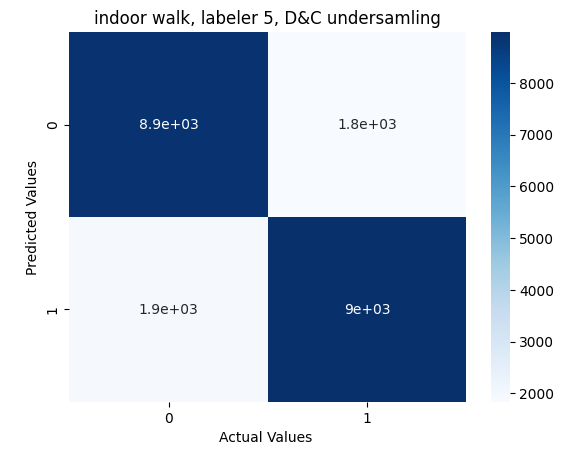

In [351]:
clf= RandomForestClassifier(n_jobs = -1)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

accuracy = []
false_negatives = []

print(" f1: ",metrics.f1_score(y_test, y_pred, average = 'macro'))

print(classification_report(y_test, y_pred))
plt.clf()
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')

ax.set_ylabel('\nPredicted Values')
ax.set_xlabel('Actual Values ')
ax.set_title('indoor walk, labeler 5, D&C undersamling')